The code in Myxomatosis.ipynb solves a predator prey model for foxes (F) and rabbits (R) in Ireland from 1950 to 1980. In 1954 the Irish government introduced myxomatosis (M) as a method of reducing the rabbit population. The following system of equations describes this relationship.



From the output of the code describe the relationship between rabbits, foxes and myxomatosis. From this model do you think that the introduction did what it was intended to do?

In [7]:
# This example describe how to integrate ODEs with scipy.integrate module, and how
# to use the matplotlib module to plot trajectories, direction fields and other
# useful information.
# 
# == Presentation of the Lokta-Volterra Model ==
# 
# We will have a look at the Lokta-Volterra model, also known as the
# predator-prey equations, which are a pair of first order, non-linear, differential
# equations frequently used to describe the dynamics of biological systems in
# which two species interact, one a predator and one its prey. They were proposed
# independently by Alfred J. Lotka in 1925 and Vito Volterra in 1926:
# du/dt =  a*u -   b*u*v
# dv/dt = -c*v + d*b*u*v 
# 
# with the following notations:
# 
# *  u: number of preys (for example, rabbits)
# 
# *  v: number of predators (for example, foxes)  
#   
# * a, b, c, d are constant parameters defining the behavior of the population:    
# 
#   + a is the natural growing rate of rabbits, when there's no fox
# 
#   + b is the natural dying rate of rabbits, due to predation
# 
#   + c is the natural dying rate of fox, when there's no rabbit
# 
#   + d is the factor describing how many caught rabbits let create a new fox
# 
# We will use X=[u, v] to describe the state of both populations.
# 
# Definition of the equations:
# 
from numpy import *
import pylab as p

# DEFINITION OF PARAMETERS
a = 1
b = 0.1
c = 1.5
d = 0.075

# INITIAL CONDITIONS
X_0 = array([ 25,4])

In [8]:
N=10000
t_start=1950.0
t_end=1980.0

t = linspace(t_start, t_end,  N)              # time
rabbits=zeros(N)
foxes=zeros(N)
myxomatosis=ones(N)
# 
# We can now use Matplotlib to plot the evolution of both populations:
# 
h=(t_end-t_start)/N
rabbits[0]=X_0[0]
foxes[0]=X_0[1]

In [9]:
for i in range (1,N):
    rabbits[i]=rabbits[i-1]+h*rabbits[i-1]*(a-b*(foxes[i-1]+(myxomatosis [i-1]-1)))
    foxes[i]=foxes[i-1]+h*foxes[i-1]*((-c+d*rabbits[i-1]))
    if t[i]>1954:
        myxomatosis[i]=myxomatosis[i-1]+h*myxomatosis[i-1]*(-1+0.1*rabbits[i-1])        

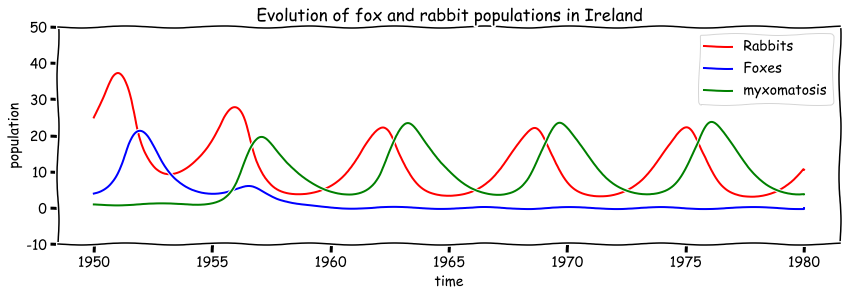

In [10]:
p.xkcd()
f1 = p.figure(figsize=(14,4))
p.plot(t, rabbits, 'r-', label='Rabbits')
p.plot(t, foxes  , 'b-', label='Foxes')
p.plot(t, myxomatosis, 'g', label='myxomatosis')
p.grid()
p.legend(loc='best')
p.ylim(-10, 50)
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of fox and rabbit populations in Ireland')
f1.savefig('rabbits_and_foxes_myxomatosis.png')
p.show()

Wikipedia contributors. (2021, January 14). Myxomatosis. In Wikipedia, The Free Encyclopedia. Retrieved 15:23, February 22, 2021, from https://en.wikipedia.org/w/index.php?title=Myxomatosis&oldid=1000214621